In [1]:
%mkdir /kaggle/working/tmp
%rm -r /kaggle/working/*

In [2]:
!git clone https://github.com/pnthi1604/research_BART
!pip install torcheval

Cloning into 'research_BART'...
remote: Enumerating objects: 878, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 878 (delta 25), reused 33 (delta 15), pack-reused 827
Receiving objects: 100% (878/878), 811.88 KiB | 16.91 MiB/s, done.
Resolving deltas: 100% (566/566), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.2/179.2 kB 5.4 MB/s eta 0:00:00


In [3]:
from research_BART import train, test, config

In [4]:
# const
BART = "bart"
BART_WITH_EMBEDDING = "bart_with_embedding"
FINE_TUNE_BART_WITH_RANDOM_ENCODER = "fine_tune_bart_with_random_encoder"
FIRST_STEP = "FIRST"
SECOND_STEP = "SECOND"

In [5]:
cf = config.get_config("/kaggle/working")
cf["tokenizer_src"] = "/kaggle/input/8-dataset/tokenizer/tokenizer_src.json"
cf["tokenizer_tgt"] = "/kaggle/input/1m-mask-vi-and-vi-ds-wordlevel/tokenizer/tokenizer_tgt.json"
cf["train_ds"] = "/kaggle/input/8-dataset/train.csv"
cf["test_ds"] = "/kaggle/input/8-dataset/test.csv"
cf["batch_train"] = cf["batch_val"] = 32
cf["model_train"] = FINE_TUNE_BART_WITH_RANDOM_ENCODER
cf["step_train"] = FIRST_STEP
cf["num_steps"] = 10000
cf["val_steps"] = 1000
cf["lr"] = 0.3
cf["dropout"] = 0.1
cf["vocab_size_encoder_bart"] = 30000
cf["init_type"] = "normal"
cf["checkpoint"] = "/kaggle/input/pretrained-dataset-90k-step/90k_step/model/model_0000090000.pt"
cf

{'base_dir': '/kaggle/working',
 'tokenizer_tgt': '/kaggle/input/1m-mask-vi-and-vi-ds-wordlevel/tokenizer/tokenizer_tgt.json',
 'tokenizer_src': '/kaggle/input/8-dataset/tokenizer/tokenizer_src.json',
 'use_tokenizer': 'huggingface',
 'special_tokens': ['<s>', '</s>', '<pad>', '<unk>', '<mask>'],
 'vocab_size': 30000,
 'min_frequency': 2,
 'model_folder': '/kaggle/working/model',
 'model_basename': 'model_',
 'model_bart_basename': 'bart_model_',
 'model_inputs_embeds': 'inputs_embeds_',
 'model_decoder_inputs_embeds': 'decoder_inputs_embeds_',
 'model_out': 'out_',
 'preload': 'latest',
 'data': '/kaggle/working/data',
 'log_dir': '/kaggle/working/log',
 'log_files': '/kaggle/working/log/log_files',
 'loss_train': '/kaggle/working/log/log_files/loss_train.json',
 'loss_val': '/kaggle/working/log/log_files/loss_val.json',
 'loss_train_step': '/kaggle/working/log/log_files/loss_train_step.json',
 'loss_val_step': '/kaggle/working/log/log_files/loss_val_step.json',
 'learning_rate_step':

Created:
/kaggle/working/model
/kaggle/working/log
/kaggle/working/log/log_files
/kaggle/input/8-dataset/tokenizer/tokenizer_src.json
/kaggle/input/1m-mask-vi-and-vi-ds-wordlevel/tokenizer/tokenizer_tgt.json
Read tokenizer successfully
Vocab size src:  25000
Vocab size tgt:  30000
inputs_embeds.weight
random_encoder.embed_tokens.weight
random_encoder.embed_positions.weight
random_encoder.layers.0.self_attn.k_proj.weight
random_encoder.layers.0.self_attn.k_proj.bias
random_encoder.layers.0.self_attn.v_proj.weight
random_encoder.layers.0.self_attn.v_proj.bias
random_encoder.layers.0.self_attn.q_proj.weight
random_encoder.layers.0.self_attn.q_proj.bias
random_encoder.layers.0.self_attn.out_proj.weight
random_encoder.layers.0.self_attn.out_proj.bias
random_encoder.layers.0.self_attn_layer_norm.weight
random_encoder.layers.0.self_attn_layer_norm.bias
random_encoder.layers.0.fc1.weight
random_encoder.layers.0.fc1.bias
random_encoder.layers.0.fc2.weight
random_encoder.layers.0.fc2.bias
random

Trainning: 100%|██████████| 7032/7032 [1:04:09<00:00,  1.83it/s, loss=0.197, global_step=0000007031]


/kaggle/input/8-dataset/tokenizer/tokenizer_src.json
/kaggle/input/1m-mask-vi-and-vi-ds-wordlevel/tokenizer/tokenizer_tgt.json
Read tokenizer successfully
Vocab size src:  25000
Vocab size tgt:  30000
Read dataset successfully
Length train dataset:  225000
Length val dataset:  25000
Length test dataset:  3131
Get dataloader successfully


Trainning:  42%|████▏     | 2967/7032 [27:22<37:30,  1.81it/s, loss=0.231, global_step=0000009999]


Saved model at /kaggle/working/model/model_0000010000.pt
Saved config at /kaggle/working/model/config_0000010000.json


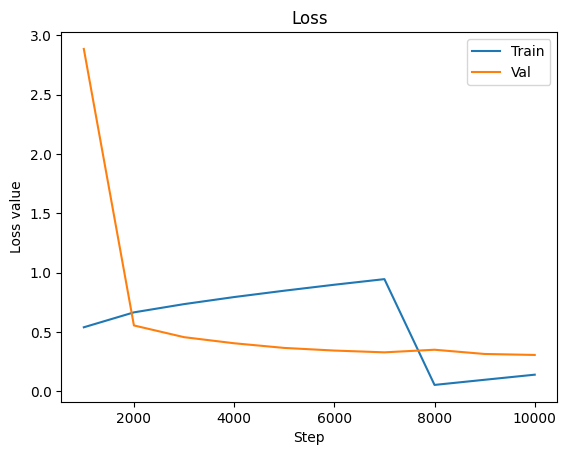

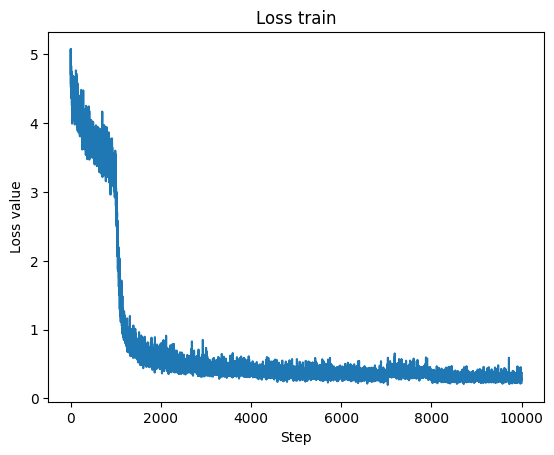

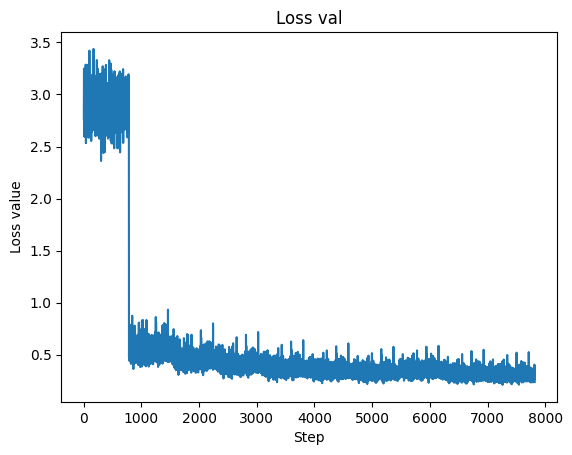

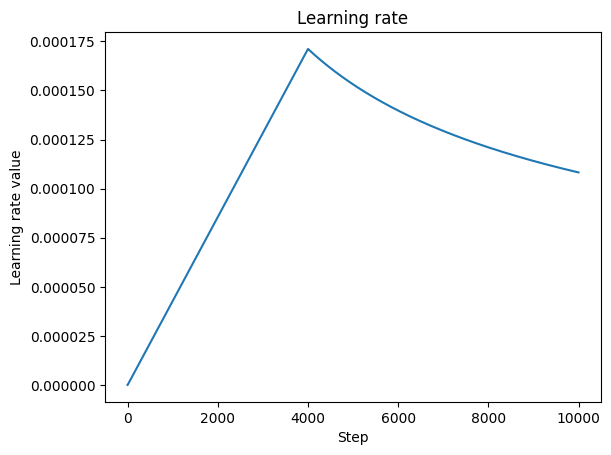

In [6]:
train.train(cf)

Created:
/kaggle/working/model
/kaggle/working/log
/kaggle/working/log/log_files
/kaggle/input/8-dataset/tokenizer/tokenizer_src.json
/kaggle/input/1m-mask-vi-and-vi-ds-wordlevel/tokenizer/tokenizer_tgt.json
Read tokenizer successfully
Vocab size src:  25000
Vocab size tgt:  30000
FineTuneBartWithRandomEncoder(
  (inputs_embeds): Embedding(25000, 768)
  (decoder_inputs_embeds): Embedding(30000, 768)
  (random_encoder): BartEncoder(
    (embed_tokens): Embedding(30000, 768, padding_idx=2)
    (embed_positions): BartLearnedPositionalEmbedding(102, 768)
    (layers): ModuleList(
      (0-5): 6 x BartEncoderLayer(
        (self_attn): BartSdpaAttention(
          (k_proj): Linear(in_features=768, out_features=768, bias=True)
          (v_proj): Linear(in_features=768, out_features=768, bias=True)
          (q_proj): Linear(in_features=768, out_features=768, bias=True)
          (out_proj): Linear(in_features=768, out_features=768, bias=True)
        )
        (self_attn_layer_norm): LayerN

Trainning:   7%|▋         | 499/7032 [04:32<59:30,  1.83it/s, loss=0.312, global_step=0000010499]


Saved model at /kaggle/working/model/model_0000010500.pt
Saved config at /kaggle/working/model/config_0000010500.json


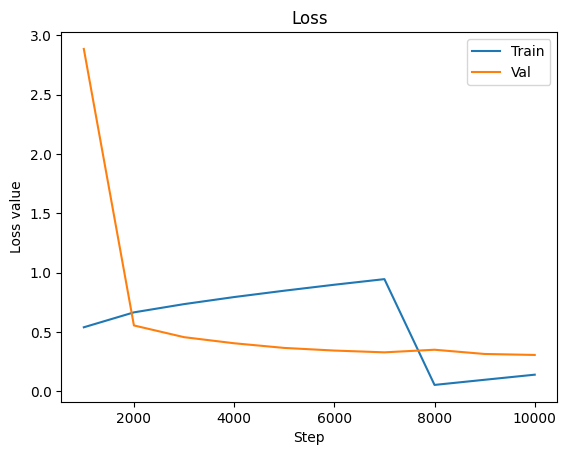

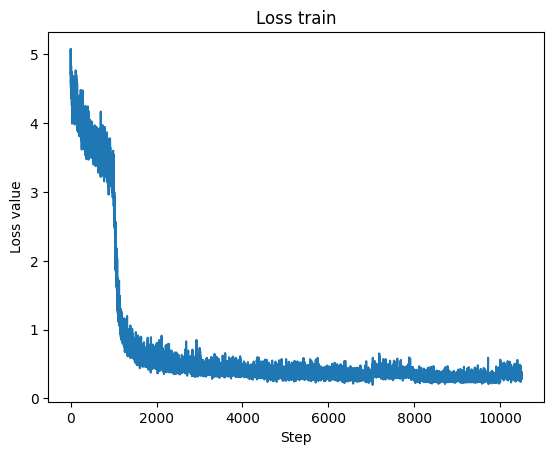

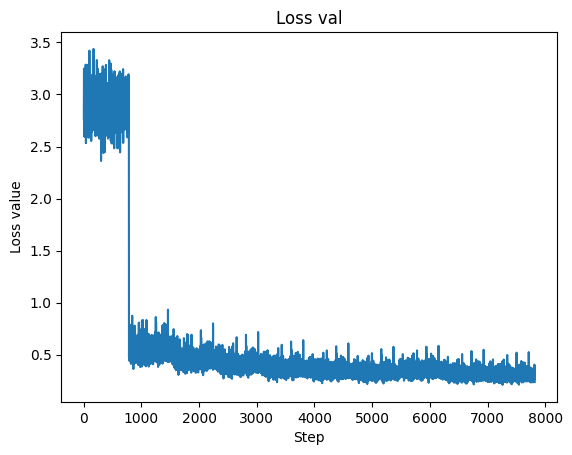

x and y must have same first dimension, but have shapes (10500,) and (500,)
/kaggle/input/8-dataset/tokenizer/tokenizer_src.json
/kaggle/input/1m-mask-vi-and-vi-ds-wordlevel/tokenizer/tokenizer_tgt.json
Read tokenizer successfully
Vocab size src:  25000
Vocab size tgt:  30000
/kaggle/input/8-dataset/tokenizer/tokenizer_src.json
/kaggle/input/1m-mask-vi-and-vi-ds-wordlevel/tokenizer/tokenizer_tgt.json
Read tokenizer successfully
Vocab size src:  25000
Vocab size tgt:  30000
Read dataset successfully
Length train dataset:  225000
Length val dataset:  25000
Length test dataset:  10
Get dataloader successfully
FineTuneBartWithRandomEncoder(
  (inputs_embeds): Embedding(25000, 768)
  (decoder_inputs_embeds): Embedding(30000, 768)
  (random_encoder): BartEncoder(
    (embed_tokens): Embedding(30000, 768, padding_idx=2)
    (embed_positions): BartLearnedPositionalEmbedding(102, 768)
    (layers): ModuleList(
      (0-5): 6 x BartEncoderLayer(
        (self_attn): BartSdpaAttention(
          

Testing model...:   0%|          | 0/10 [00:00<?, ?it/s]


    SOURCE: cái tật sạo không bỏ .
    TARGET: cái tật xạo không bỏ .
 PREDICTED: hoàn không bỏ . . . không . . . . . .
BLEU OF SENTENCE 1
BLEU_1: 0.15384617447853088
BLEU_2: 0.0
BLEU_3: 0.0
BLEU_4: 0.0


Testing model...:  10%|█         | 1/10 [00:01<00:09,  1.01s/it]

recall = 0.1666666716337204
precision = 0.0555555559694767
f_05 = 0.06410256773233414

    SOURCE: cái ông lầy nàm thơ .
    TARGET: cái ông này làm thơ .
 PREDICTED: cái ông lấy làm thơ . . . làm thơ ông . ông ông làm
BLEU OF SENTENCE 2
BLEU_1: 0.3333333134651184
BLEU_2: 0.26726123690605164
BLEU_3: 0.17645859718322754
BLEU_4: 0.0


Testing model...:  20%|██        | 2/10 [00:01<00:04,  1.71it/s]

recall = 0.8333333730697632
precision = 0.8333333730697632
f_05 = 0.8333333730697632

    SOURCE: sài lu không ăn thua gì .
    TARGET: xài lu không ăn thua gì .
 PREDICTED: lũ không không thua mỹ . . . . mỹ . . không .
BLEU OF SENTENCE 3
BLEU_1: 0.2142857015132904
BLEU_2: 0.0
BLEU_3: 0.0
BLEU_4: 0.0


Testing model...:  30%|███       | 3/10 [00:01<00:03,  2.23it/s]

recall = 0.2857142984867096
precision = 0.1428571492433548
f_05 = 0.1587301641702652

    SOURCE: người hiểu xẽ nhìn ra .
    TARGET: người hiểu sẽ nhìn ra .
 PREDICTED: người hiểu sẽ nhìn ra . ra sẽ nhìn nhìn nhìn ra ra sẽ . ra nhìn
BLEU OF SENTENCE 4
BLEU_1: 0.3529411852359772
BLEU_2: 0.3321056067943573
BLEU_3: 0.3086789846420288
BLEU_4: 0.28175950050354004


Testing model...:  40%|████      | 4/10 [00:01<00:02,  2.54it/s]

recall = 1.0
precision = 1.0
f_05 = 1.0

    SOURCE: sử sự không còn gì để nói .
    TARGET: xử sự không còn gì để nói .
 PREDICTED: sự sự không còn gì để nói . nói sự nói không nói sự không nói sự
BLEU OF SENTENCE 5
BLEU_1: 0.4117647111415863
BLEU_2: 0.39295265078544617
BLEU_3: 0.37198007106781006
BLEU_4: 0.34823527932167053


Testing model...:  50%|█████     | 5/10 [00:02<00:01,  2.75it/s]

recall = 0.875
precision = 0.8125
f_05 = 0.8194444179534912


Testing model...:  60%|██████    | 6/10 [00:03<00:02,  1.83it/s]


    SOURCE: như vậ mới có nền văn minh .
    TARGET: như vậy mới có nền văn minh .
 PREDICTED: như và mới có có văn văn . văn văn văn có văn văn văn văn văn văn văn văn văn minh . mới . văn văn văn văn văn văn minh . văn . . văn . . văn văn văn . . . . . . . . mới . . . văn . . . . . . . . . . . mới . . . . . . văn văn . văn . . . . . . . . . . . . . . . . . . . . . .
BLEU OF SENTENCE 6
BLEU_1: 0.060606054961681366
BLEU_2: 0.04307304322719574
BLEU_3: 0.02674318291246891
BLEU_4: 0.0
recall = 0.625
precision = 0.5
f_05 = 0.5138888955116272


Testing model...:  70%|███████   | 7/10 [00:03<00:01,  2.16it/s]


    SOURCE: lấy cái lu trống lụt .
    TARGET: lấy cái lu chống lụt .
 PREDICTED: lấy cái lũ trống lụt . . lụt . ba . lũ . lũ .
BLEU OF SENTENCE 7
BLEU_1: 0.2666666805744171
BLEU_2: 0.1951800286769867
BLEU_3: 0.0
BLEU_4: 0.0
recall = 0.6666666865348816
precision = 0.6666666865348816
f_05 = 0.6666666865348816


Testing model...:  80%|████████  | 8/10 [00:03<00:01,  2.00it/s]


    SOURCE: thỳ mọi biện minh bằng thườ .
    TARGET: thì mọi biện minh bằng thừa .
 PREDICTED: mọi biện biện bằng mọi mọi mọi mọi mọi biện mọi mọi mọi mọi mọi biện mọi mọi . biện mọi mọi biện biện minh bằng mọi mọi mọi mọi mọi mọi biện mọi hành . . mọi . . biện . mọi mọi mọi biện biện mọi mọi
BLEU OF SENTENCE 8
BLEU_1: 0.10204082727432251
BLEU_2: 0.07985958456993103
BLEU_3: 0.051386844366788864
BLEU_4: 0.0
recall = 0.1428571492433548
precision = 0.0714285746216774
f_05 = 0.0793650820851326


Testing model...:  90%|█████████ | 9/10 [00:04<00:00,  2.31it/s]


    SOURCE: youtube thấy lời tục tỉu quá .
    TARGET: youtube thấy lời tục tĩu quá .
 PREDICTED: youtube thấy lời tục tiểu quá . lời quá thấy quá . . lời qua
BLEU OF SENTENCE 9
BLEU_1: 0.4000000059604645
BLEU_2: 0.33806172013282776
BLEU_3: 0.26003164052963257
BLEU_4: 0.19564753770828247
recall = 0.8571429252624512
precision = 0.8571429252624512
f_05 = 0.8571429252624512


Testing model...: 100%|██████████| 10/10 [00:04<00:00,  2.19it/s]


    SOURCE: nói chuyện nghe rất hòa hã .
    TARGET: nói chuyện nghe rất hòa nhã .
 PREDICTED: nói chuyện nghe rất hòa hà . rất rất rất . rất nghe hạ rất chuyện rất rất
BLEU OF SENTENCE 10
BLEU_1: 0.3333333134651184
BLEU_2: 0.28005602955818176
BLEU_3: 0.24499864876270294
BLEU_4: 0.21042990684509277
recall = 0.8571429252624512
precision = 0.8571429252624512
f_05 = 0.8571429252624512


recall = 0.6323529481887817
precision = 0.5661764740943909
f_05 = 0.5752257108688354
     bleu_1    bleu_2    bleu_3    bleu_4    recall  precision      f_05
0  0.183824  0.145081  0.112397  0.087521  0.632353   0.566176  0.575226


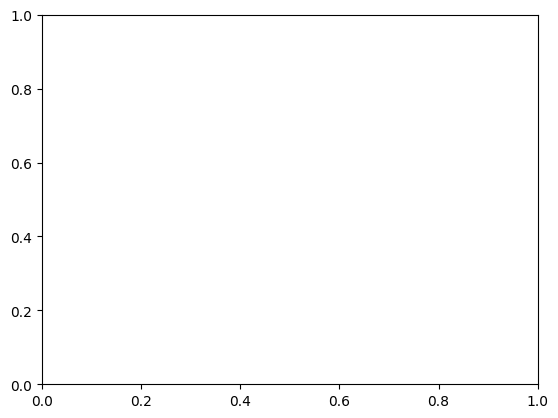

In [7]:
cf["continue_step"] = True
cf["step_train"] = SECOND_STEP
cf["num_steps"] += 500
cf["max_num_test"] = 10
train.train(cf)
test.test(cf)

In [8]:
cf["max_num_test"] = 3131

In [9]:
test.test(cf)

/kaggle/input/8-dataset/tokenizer/tokenizer_src.json
/kaggle/input/1m-mask-vi-and-vi-ds-wordlevel/tokenizer/tokenizer_tgt.json
Read tokenizer successfully
Vocab size src:  25000
Vocab size tgt:  30000
/kaggle/input/8-dataset/tokenizer/tokenizer_src.json
/kaggle/input/1m-mask-vi-and-vi-ds-wordlevel/tokenizer/tokenizer_tgt.json
Read tokenizer successfully
Vocab size src:  25000
Vocab size tgt:  30000
Read dataset successfully
Length train dataset:  225000
Length val dataset:  25000
Length test dataset:  3131
Get dataloader successfully
FineTuneBartWithRandomEncoder(
  (inputs_embeds): Embedding(25000, 768)
  (decoder_inputs_embeds): Embedding(30000, 768)
  (random_encoder): BartEncoder(
    (embed_tokens): Embedding(30000, 768, padding_idx=2)
    (embed_positions): BartLearnedPositionalEmbedding(102, 768)
    (layers): ModuleList(
      (0-5): 6 x BartEncoderLayer(
        (self_attn): BartSdpaAttention(
          (k_proj): Linear(in_features=768, out_features=768, bias=True)
          (

Testing model...:   5%|▍         | 156/3131 [00:37<09:57,  4.98it/s]


    SOURCE: cựu tổng thống donna trump .
    TARGET: cựu tổng thống donald trump .
 PREDICTED: cựu tổng thống trump trump . . . trump trump . . . thống .
BLEU OF SENTENCE 156
BLEU_1: 0.3333333134651184
BLEU_2: 0.26726123690605164
BLEU_3: 0.17645859718322754
BLEU_4: 0.0
recall = 0.8333333730697632
precision = 0.75
f_05 = 0.7592593431472778


Testing model...:  10%|▉         | 312/3131 [01:19<15:58,  2.94it/s]


    SOURCE: chúng nó đóng kiệt thôi .
    TARGET: chúng nó đóng kịch thôi .
 PREDICTED: chúng nó đóng kiệt thôi . . thôi . . . . . . .
BLEU OF SENTENCE 312
BLEU_1: 0.3333333134651184
BLEU_2: 0.26726123690605164
BLEU_3: 0.17645859718322754
BLEU_4: 0.0
recall = 0.8333333730697632
precision = 0.8333333730697632
f_05 = 0.8333333730697632


Testing model...:  15%|█▍        | 468/3131 [01:56<09:25,  4.71it/s]


    SOURCE: cách dớt đế nồi xe tay ga , sài lâu bị mòn .
    TARGET: cách vớt đế nồi xe tay ga , xài lâu bị mòn .
 PREDICTED: cách để để nồi xe tay ga , sài lâu bị mòn . . . . nồi xe tay
BLEU OF SENTENCE 468
BLEU_1: 0.5263158082962036
BLEU_2: 0.452413946390152
BLEU_3: 0.3919202387332916
BLEU_4: 0.32594820857048035
recall = 0.769230842590332
precision = 0.769230842590332
f_05 = 0.769230842590332


Testing model...:  20%|█▉        | 624/3131 [02:40<09:12,  4.54it/s]


    SOURCE: chứ x mà đầu tư mỡ cơ sở lắp ráp .
    TARGET: chứ x mà đầu tư mở cơ sở lắp ráp .
 PREDICTED: chứ x mà đầu tư mỡ cơ sở lắp ráp . . cơ . cơ . đầu tư chữ cơ . cơ lắp . . cơ . cơ
BLEU OF SENTENCE 624
BLEU_1: 0.3571428954601288
BLEU_2: 0.32530003786087036
BLEU_3: 0.290122926235199
BLEU_4: 0.2500152587890625
recall = 0.9090909361839294
precision = 0.9090909361839294
f_05 = 0.9090909361839294


Testing model...:  25%|██▍       | 780/3131 [03:21<08:13,  4.76it/s]


    SOURCE: không có tính điềm tỉnh .
    TARGET: không có tính điềm tĩnh .
 PREDICTED: không có tính điềm tỉnh . tỉnh . . tỉnh . tỉnh . tỉnh .
BLEU OF SENTENCE 780
BLEU_1: 0.3333333134651184
BLEU_2: 0.26726123690605164
BLEU_3: 0.22232390940189362
BLEU_4: 0.1739579737186432
recall = 0.8333333730697632
precision = 0.8333333730697632
f_05 = 0.8333333730697632


Testing model...:  30%|██▉       | 936/3131 [03:57<08:43,  4.19it/s]


    SOURCE: chài đối đáp thơ hay quá xá .
    TARGET: chà , đối đáp thơ hay quá xá .
 PREDICTED: ưu đối đáp thơ hai quá xá . quá xá đối . quá quá quá
BLEU OF SENTENCE 936
BLEU_1: 0.4000000059604645
BLEU_2: 0.33806172013282776
BLEU_3: 0.26003164052963257
BLEU_4: 0.0
recall = 0.0
precision = 0.0
f_05 = 0.0


Testing model...:  35%|███▍      | 1092/3131 [04:36<06:50,  4.97it/s]


    SOURCE: họ đi nhận đồ từ thiện đợt rầm hay mùng một .
    TARGET: họ đi nhận đồ từ thiện đợt rằm hay mùng một .
 PREDICTED: họ đi nhận đồ từ thiện đợt rầm hai mùng một . . . . . . từ thiện từ thiện đợt
BLEU OF SENTENCE 1092
BLEU_1: 0.4545454680919647
BLEU_2: 0.41612520813941956
BLEU_3: 0.3731268048286438
BLEU_4: 0.3233843147754669
recall = 0.8333333730697632
precision = 0.8333333730697632
f_05 = 0.8333333730697632


Testing model...:  40%|███▉      | 1248/3131 [05:19<13:19,  2.36it/s]


    SOURCE: tác giã phân luận về 2 tiếng chuông quá chỉnh .
    TARGET: tác giả phân luận về 2 tiếng chuông quá chỉnh .
 PREDICTED: tác mục phân luận về 2 tiếng chuông quá chỉnh . . . . . . . . 2
BLEU OF SENTENCE 1248
BLEU_1: 0.5263158082962036
BLEU_2: 0.4836508333683014
BLEU_3: 0.4583926796913147
BLEU_4: 0.4359493851661682
recall = 0.9090908765792847
precision = 0.9090908765792847
f_05 = 0.9090908765792847


Testing model...:  45%|████▍     | 1404/3131 [06:00<08:14,  3.49it/s]


    SOURCE: do sên cam nó cọ sát thôi .
    TARGET: do sên cam nó cọ xát thôi .
 PREDICTED: do cam nó có sát thôi . . . sát . nó sát sát . nó có sát sát . thôi . sát nó có sát cơ sát sát . . . . sát sát . . nó có sát . . sát . . . . . . sát
BLEU OF SENTENCE 1404
BLEU_1: 0.09999999403953552
BLEU_2: 0.06388764828443527
BLEU_3: 0.0
BLEU_4: 0.0
recall = 0.25
precision = 0.1875
f_05 = 0.1944444477558136


Testing model...:  50%|████▉     | 1560/3131 [06:45<06:54,  3.79it/s]


    SOURCE: không đã kích cá nhân .
    TARGET: không đả kích cá nhân .
 PREDICTED: không đã kích cá nhân . cá cá cá nhân . cá nhân đã cá
BLEU OF SENTENCE 1560
BLEU_1: 0.3333333134651184
BLEU_2: 0.26726123690605164
BLEU_3: 0.22232390940189362
BLEU_4: 0.1739579737186432
recall = 0.8333333730697632
precision = 0.8333333730697632
f_05 = 0.8333333730697632


Testing model...:  55%|█████▍    | 1716/3131 [07:23<10:20,  2.28it/s]


    SOURCE: cháu tôi bị đụng xe chết mà đòi mỗ tử thi xét nghiệm .
    TARGET: cháu tôi bị đụng xe chết mà đòi mổ tử thi xét nghiệm .
 PREDICTED: cháu tôi bị đúng xe chết mà đòi nỗ tử thi xét nghiệm . xét xét xét xét xe mà . mà . . từ thi xét xét xét chết mà thi xét cử thi xét xét nghiệm xét xét xét nghiệm thi . xét xét xét xét xét thi xét xét nghiệm . . . . nghiệm . . . . nghiệm . . . thi . . . . xét xét nghiệm . . . . . . tư xét nghiệm xét xét xét thi xét nghiệm xét xét xét xét xét . . nghiệm xét nghiệm
BLEU OF SENTENCE 1716
BLEU_1: 0.12121210992336273
BLEU_2: 0.10550698637962341
BLEU_3: 0.08830402791500092
BLEU_4: 0.0681079849600792
recall = 0.8571428656578064
precision = 0.8571428656578064
f_05 = 0.8571428656578064


Testing model...:  60%|█████▉    | 1872/3131 [08:06<08:14,  2.55it/s]


    SOURCE: đài của x có khác nhĩ ? .
    TARGET: đài của x có khác nhỉ ? .
 PREDICTED: đài của x có khác nhĩ ? . ? ? của ? ? ? ? ? của khác nhĩ ? ? ? ? của ? khác nhĩ có khác nhĩ . ? ? ? ? ? ? ? ? khác ? ? ? ? ? ? ? . ?
BLEU OF SENTENCE 1872
BLEU_1: 0.1428571492433548
BLEU_2: 0.12198752164840698
BLEU_3: 0.09829951077699661
BLEU_4: 0.08016440272331238
recall = 0.875
precision = 0.875
f_05 = 0.875


Testing model...:  65%|██████▍   | 2028/3131 [08:47<06:26,  2.85it/s]


    SOURCE: vẫn giữ được mùi vị đặc chưng của yến .
    TARGET: vẫn giữ được mùi vị đặc trưng của yến .
 PREDICTED: vẫn giữ được mùi vị đặc chung của yến . vị của giữ của vị của mùi vị đặc dụng của cư của giữ . vị vị vị của đặc của giữ của giữ của của của . vị
BLEU OF SENTENCE 2028
BLEU_1: 0.23076923191547394
BLEU_2: 0.20617982745170593
BLEU_3: 0.17909638583660126
BLEU_4: 0.14791758358478546
recall = 0.9000000357627869
precision = 0.9000000357627869
f_05 = 0.9000000357627869


Testing model...:  70%|██████▉   | 2184/3131 [09:26<04:18,  3.66it/s]


    SOURCE: bạn đọc hướng dẫn mà vẩn không biết cách dùng có thể nhắn .
    TARGET: bạn đọc hướng dẫn mà vẫn không biết cách dùng có thể nhắn .
 PREDICTED: bạn đọc hướng dẫn mà văn không không cách dùng có có nhắn . . có dẫn . . . có . . hướng . hướng văn . hướng văn . hướng . dẫn . thể dẫn
BLEU OF SENTENCE 2184
BLEU_1: 0.3243243396282196
BLEU_2: 0.2511236071586609
BLEU_3: 0.19316227734088898
BLEU_4: 0.14349262416362762
recall = 0.7857142686843872
precision = 0.7142857313156128
f_05 = 0.7222222089767456


Testing model...:  75%|███████▍  | 2340/3131 [10:10<03:20,  3.95it/s]


    SOURCE: được hôm bố chở đi choáy phố .
    TARGET: được hôm bố chở đi cháy phố .
 PREDICTED: được hôm bố chở đi phố . phố . đi bố phố phố phố
BLEU OF SENTENCE 2340
BLEU_1: 0.5
BLEU_2: 0.43852901458740234
BLEU_3: 0.3636181354522705
BLEU_4: 0.30576902627944946
recall = 0.625
precision = 0.625
f_05 = 0.625


Testing model...:  80%|███████▉  | 2496/3131 [10:53<02:43,  3.87it/s]


    SOURCE: nếu giải được bài này thì bạn cũm đỉnh đấy .
    TARGET: nếu giải được bài này thì bạn cũng đỉnh đấy .
 PREDICTED: nếu giải được bài này thì bạn đỉnh đấy . . . . bạn
BLEU OF SENTENCE 2496
BLEU_1: 0.7142857313156128
BLEU_2: 0.6629935503005981
BLEU_3: 0.6034799814224243
BLEU_4: 0.5316967368125916
recall = 0.7272727489471436
precision = 0.6818182468414307
f_05 = 0.6868687868118286


Testing model...:  85%|████████▍ | 2652/3131 [11:38<01:28,  5.39it/s]


    SOURCE: như trưa từng được ăn .
    TARGET: như chưa từng được ăn .
 PREDICTED: như trưa từng được ăn . được từng được từng trưa từng được từng . được . được được ăn . được ăn từng
BLEU OF SENTENCE 2652
BLEU_1: 0.2083333283662796
BLEU_2: 0.16484512388706207
BLEU_3: 0.13518229126930237
BLEU_4: 0.10414419323205948
recall = 0.8333333730697632
precision = 0.8333333730697632
f_05 = 0.8333333730697632


Testing model...:  90%|████████▉ | 2808/3131 [12:24<01:44,  3.08it/s]


    SOURCE: từ một thợ lấp ráp điện đóm , tới kỹ sư hoặc luật sư .
    TARGET: từ một thợ lắp ráp điện đóm , tới kỹ sư hoặc luật sư .
 PREDICTED: từ một thợ lấp ráp điện đón , , kỹ sư hoặc luật sư . . . . điện điện điện đón , điện , điện điện luật , điện , , , điện , điện hoặc luật hoặc luật điện , điện , . . . . .
BLEU OF SENTENCE 2808
BLEU_1: 0.2448979616165161
BLEU_2: 0.2020304948091507
BLEU_3: 0.1631430685520172
BLEU_4: 0.12972308695316315
recall = 0.8000000715255737
precision = 0.7666667103767395
f_05 = 0.7703704237937927


Testing model...:  95%|█████████▍| 2964/3131 [13:13<01:01,  2.71it/s]


    SOURCE: khi trở về năm 2007 gặp lại sun được ít hôm thì cả hai cùng phải chết đuổi trong tàu ngầm .
    TARGET: khi trở về năm 2007 gặp lại sun được ít hôm thì cả hai cùng phải chết đuối trong tàu ngầm .
 PREDICTED: khi trở về năm 2007 gặp lại giữ được ít hôm thì cả hai cùng phải chết đuổi trong tàu ngầm . phải được . phải gặp tàu . . . . . được được hôm ít phải hôm thì gặp tàu hai lại . cùng được . về
BLEU OF SENTENCE 2964
BLEU_1: 0.40816327929496765
BLEU_2: 0.3802075982093811
BLEU_3: 0.35050204396247864
BLEU_4: 0.3185493052005768
recall = 0.9090909361839294
precision = 0.9090909361839294
f_05 = 0.9090909361839294


Testing model...: 100%|█████████▉| 3120/3131 [14:13<00:03,  2.85it/s]


    SOURCE: đang tín mua xe củ về lm lại nghe xong khỏi mua lun .
    TARGET: đang tính mua xe cũ về làm lại nghe xong khỏi mua luôn .
 PREDICTED: đang tín mua xe củ về lại nghe xong khỏi mua quán . . . . mua . . . .
BLEU OF SENTENCE 3120
BLEU_1: 0.4761904776096344
BLEU_2: 0.34503278136253357
BLEU_3: 0.2658863961696625
BLEU_4: 0.21377722918987274
recall = 0.3571428656578064
precision = 0.3214285969734192
f_05 = 0.3253968358039856


Testing model...: 100%|██████████| 3131/3131 [14:18<00:00,  3.65it/s]


recall = 0.6745297908782959
precision = 0.6768330931663513
f_05 = 0.6679832339286804
     bleu_1    bleu_2   bleu_3    bleu_4   recall  precision      f_05
0  0.244362  0.209291  0.17908  0.153353  0.67453   0.676833  0.667983
